# **Reading data 🗂️**

In [ ]:
import pandas as pd
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_order_types(file_content):
    # Assuming 8-bit unsigned integers
    dtype = 'uint8'

    # Reshape the flattened array into (n, 2) shape
    points = file_content.reshape(-1, 2)

    print(points)

    # Create a DataFrame
    df = pd.DataFrame(points, columns=['x', 'y'], dtype=dtype)

    return df

def read_order_types1(file_content):
    # Assuming 8-bit unsigned integers
    dtype = 'uint8'

    # Reshape the flattened array into (n, 2) shape
    points = file_content.reshape(-1, 2)

    return points

In [ ]:
file_url = "http://www.ist.tugraz.at/staff/aichholzer/research/rp/triangulations/ordertypes/data/otypes06.b08"

# downloading
response = requests.get(file_url)
file_content = response.content

# Use BytesIO to create a file-like object from the bytes content
file_like_object = BytesIO(file_content)

b'\xe6\xc0\xf8N\x94$6H\x1e\xa0~\xdc\xa9 T\x04\x0b%L\xff\x93\xcd\xf4\xc6q\xf7\xb1\xec\xf99\xd0\x08]\xa1\x07\x91\x00\xac\x10\xc6\xf1\xf4\x9d\x8cenc\x0c[\n'
b'7\x07\x1c\xf9>\xbd\xb6l\xf8xI\xc9\xa0\xad\xdbSw^Q\x87%7\xf1c\xa4\x1d\x0fUIlq\xa2,\xe3\x0esi\xee\xcd\xdcv\x8e\xf2\x13J\x1f\x02\xe3d\xf3\xeb\xd1i\xca\x9a\xa3*\r\xcf\xd3\xeb\x10\xaaB\x82\x19Y\xc5)\xe6\x02\xee\xf5\xda\xe3\x82\xc6x}\x93\xec\x1b\xf4\x05\x03H\x90\xa7\xb2\x89\xd9\x86\xdd\xfb\xf0 \x0f\x07=f\xb4Kv\xa4^\xf9\x15\xf7\xebg\x85QVz2]\x14\t\x05\xf0\xfd\x88\xc2\x83?\xb6eSA\x0f\x1d\x15k\xebPh\x94wmA\xe2Y'


In [ ]:
# Reading content
file_content_array = np.frombuffer(file_like_object.getvalue(), dtype=np.uint8)
print(file_content_array)

# Parse the content into a DataFrame
df = read_order_types(file_content_array)

[230 192 248  78 148  36  54  72  30 160 126 220 169  32  84   4  11  37
  76 255 147 205 244 198 113 247 177 236 249  57 208   8  93 161   7 145
   0 172  16 198 241 244 157 140 101 110  99  12  91  10  55   7  28 249
  62 189 182 108 248 120  73 201 160 173 219  83 119  94  81 135  37  55
 241  99 164  29  15  85  73 108 113 162  44 227  14 115 105 238 205 220
 118 142 242  19  74  31   2 227 100 243 235 209 105 202 154 163  42  13
 207 211 235  16 170  66 130  25  89 197  41 230   2 238 245 218 227 130
 198 120 125 147 236  27 244   5   3  72 144 167 178 137 217 134 221 251
 240  32  15   7  61 102 180  75 118 164  94 249  21 247 235 103 133  81
  86 122  50  93  20   9   5 240 253 136 194 131  63 182 101  83  65  15
  29  21 107 235  80 104 148 119 109  65 226  89]
[[230 192]
 [248  78]
 [148  36]
 [ 54  72]
 [ 30 160]
 [126 220]
 [169  32]
 [ 84   4]
 [ 11  37]
 [ 76 255]
 [147 205]
 [244 198]
 [113 247]
 [177 236]
 [249  57]
 [208   8]
 [ 93 161]
 [  7 145]
 [  0 172]
 [ 16 198]


# **Point set 📌**

In [ ]:
print(df)

         x    y
0      218   48
1      157   54
2       88   66
3       76   72
4       61   90
...    ...  ...
26515  115  202
26516  120  207
26517  122  154
26518  145   75
26519  227   10

[26520 rows x 2 columns]


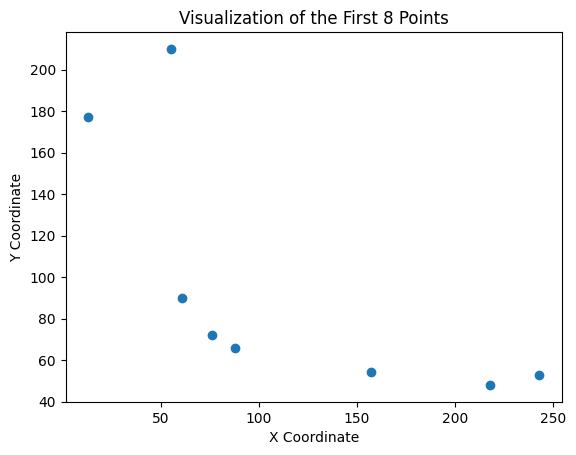

In [ ]:
# Visualize the first 8 points
plt.scatter(df['x'][:8], df['y'][:8])
plt.title('Visualization of the First 8 Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

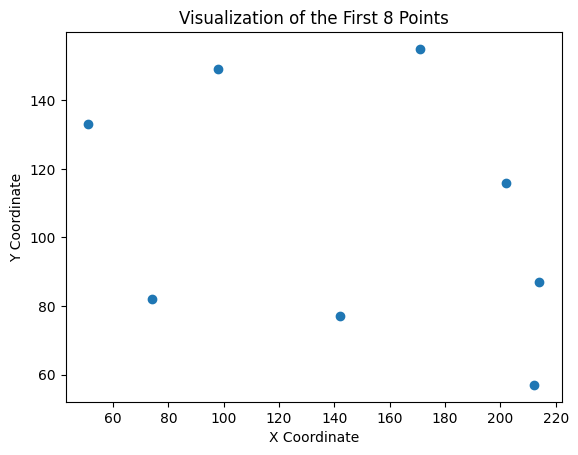

In [ ]:
# Visualize the second 8 points
plt.scatter(df['x'][8:16], df['y'][8:16])
plt.title('Visualization of the First 8 Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

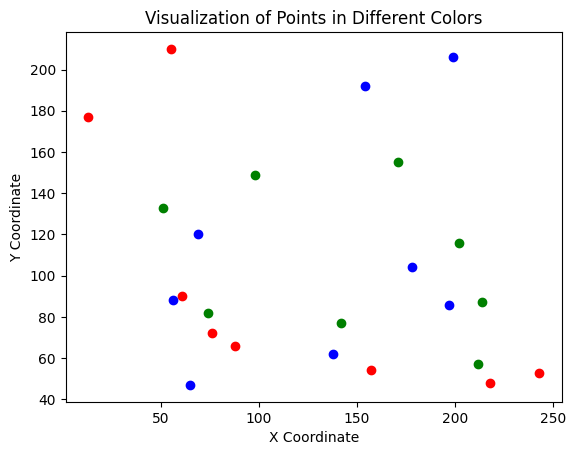

In [ ]:
df1 = df.iloc[:8]
df2 = df.iloc[8:16]
df3 = df.iloc[16:24]

# Visualize the points with different colors
plt.scatter(df1['x'], df1['y'], label='First 8 Points', color='red')
plt.scatter(df2['x'], df2['y'], label='Next 8 Points', color='green')
plt.scatter(df3['x'], df3['y'], label='Last 8 Points', color='blue')

plt.title('Visualization of Points in Different Colors')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
# plt.legend()
plt.show()

# **Algorithm📝**

In [ ]:
import urllib.request
data = read_order_types1(file_content_array)
data = list(data)
data = [list(x) for x in data]
print(data)


[[230, 192], [248, 78], [148, 36], [54, 72], [30, 160], [126, 220], [169, 32], [84, 4], [11, 37], [76, 255], [147, 205], [244, 198], [113, 247], [177, 236], [249, 57], [208, 8], [93, 161], [7, 145], [0, 172], [16, 198], [241, 244], [157, 140], [101, 110], [99, 12], [91, 10], [55, 7], [28, 249], [62, 189], [182, 108], [248, 120], [73, 201], [160, 173], [219, 83], [119, 94], [81, 135], [37, 55], [241, 99], [164, 29], [15, 85], [73, 108], [113, 162], [44, 227], [14, 115], [105, 238], [205, 220], [118, 142], [242, 19], [74, 31], [2, 227], [100, 243], [235, 209], [105, 202], [154, 163], [42, 13], [207, 211], [235, 16], [170, 66], [130, 25], [89, 197], [41, 230], [2, 238], [245, 218], [227, 130], [198, 120], [125, 147], [236, 27], [244, 5], [3, 72], [144, 167], [178, 137], [217, 134], [221, 251], [240, 32], [15, 7], [61, 102], [180, 75], [118, 164], [94, 249], [21, 247], [235, 103], [133, 81], [86, 122], [50, 93], [20, 9], [5, 240], [253, 136], [194, 131], [63, 182], [101, 83], [65, 15], [29

In [ ]:
l = [i for i in range(15)]

from more_itertools import set_partitions as sp  #function in S,k to generate all partitions of S of size k

colorings = []
i=1
j=1
for part in sp(l, 4):
  if j%1000000==1:print('i have generated {} partitions'.format(j))
  j+=1
  colorings.append(part)

i have generated 1 partitions
i have generated 1000001 partitions
i have generated 2000001 partitions
i have generated 3000001 partitions
i have generated 4000001 partitions
i have generated 5000001 partitions
i have generated 6000001 partitions
i have generated 7000001 partitions
i have generated 8000001 partitions
i have generated 9000001 partitions
i have generated 10000001 partitions
i have generated 11000001 partitions
i have generated 12000001 partitions
i have generated 13000001 partitions
i have generated 14000001 partitions
i have generated 15000001 partitions
i have generated 16000001 partitions
i have generated 17000001 partitions
i have generated 18000001 partitions
i have generated 19000001 partitions
i have generated 20000001 partitions
i have generated 21000001 partitions
i have generated 22000001 partitions
i have generated 23000001 partitions
i have generated 24000001 partitions
i have generated 25000001 partitions
i have generated 26000001 partitions
i have generated 

In [ ]:
import networkx as nx
import itertools

def peek(iterable):
    try:
        first = next(iterable)
    except StopIteration:
        return None
    return first, itertools.chain([first], iterable)

def check_star_forest(forest,vertices,n):
  graph_forest = nx.Graph(forest)
  count = [0 for i in range(n)]
  big_degree = []
  for edge in forest:
    u = vertices.index(edge[0])
    v = vertices.index(edge[1])
    count[u] += 1
    count[v] += 1
    if count[u] >= 2:
      for w in big_degree:
        if not peek(nx.all_simple_paths(graph_forest, source=vertices[u], target=vertices[w])) is None:
          return False
      big_degree.append(vertices[u])
    if count[v] >= 2:
      for w in big_degree:
        if not peek(nx.all_simple_paths(graph_forest, source=vertices[v], target=vertices[w])) is None:
          return False
      big_degree.append(vertices[v])
  return True

def ccw(A,B,C):
  #(C.y-A.y) * (B.x-A.x) > (B.y-A.y) * (C.x-A.x)
  return (int(C[1])-int(A[1])) * (int(B[0])-int(A[0])) > (int(B[1])-int(A[1])) * (int(C[0])-int(A[0]))

# Return true if line segments AB and CD intersect
def intersect(A,B,C,D):
  return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

def check_planar(forest):
  for a in forest:
    for b in forest:
      if a != b and intersect(a[0],a[1],b[0],b[1]): return False
  return True

In [ ]:
def generate_edges(vertices):
  edges = []
  for u in range(len(vertices)):
    for v in range(u+1,len(vertices)):
      if u != v: edges.append((vertices[u],vertices[v]))
  return edges

def from_part_to_forests(part):
  forests = []
  for p in range(len(part)):
    forests.append([])
    for e in part[p]:
      forests[p].append(edges[e])
  return forests

def from_part_to_forests_data(part,edges_data):
  forests_data = []
  for p in range(len(part)):
    forests_data.append([])
    for e in (part[p]):
      forests_data[p].append(edges_data[e])
  return forests_data

In [ ]:
def check_sf_partition(partition, n):
  fs = from_part_to_forests(partition)
  for f in fs:
    if not check_star_forest(f,vertices,n): return False
  return True

In [ ]:
def check_pointset(m,n):
  vertices_data = data[m:m+n]
  edges_data = generate_edges(vertices_data)
  j = 0
  res = []
  for check in valid_sfs:
    if j%30 == 0: print('checked {} partitions'.format(j))
    j+=1
    forests_data = from_part_to_forests_data(check,edges_data)
    if check_forests_planar(forests_data): res.append(check)
  return (vertices_data,res)

def check_forests_planar(fore):
  for fo in fore:
    if not check_planar(fo): return False
  return True


In [ ]:
vertices = [i for i in range(6)]
edges = generate_edges(vertices)

print(len(colorings))

k=0
valid_sfs = []
for c in colorings:
  if k%10000000 == 0: print('checked {} partitions'.format(k))
  k+=1
  if check_sf_partition(c,6): valid_sfs.append(c)

print(len(valid_sfs))

42355950
checked 0 partitions
checked 10000000 partitions
checked 20000000 partitions
checked 30000000 partitions
checked 40000000 partitions
120


In [ ]:
check_sf_partition([[2, 3, 5, 11], [4, 8, 9, 12], [1, 7, 13], [0, 6, 10, 14]],6)

True

In [ ]:
check_pointset(90,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[29, 21], [107, 235], [80, 104], [148, 119], [109, 65], [226, 89]],
 [[[0, 6, 10, 11], [1, 4, 7, 12], [3, 5, 13], [2, 8, 9, 14]],
  [[0, 3, 9, 11], [2, 5, 8, 12], [4, 7, 10, 13], [1, 6, 14]]])

In [ ]:
[[2, 3, 5, 11], [4, 8, 9, 12], [1, 7, 13], [0, 6, 10, 14]] in valid_sfs

True

In [ ]:
check_pointset(84,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[5, 240], [253, 136], [194, 131], [63, 182], [101, 83], [65, 15]],
 [[[3, 4, 5, 6], [0, 11, 12], [2, 7, 10, 13], [1, 8, 9, 14]],
  [[2, 4, 5, 7], [0, 11, 12], [1, 8, 10, 13], [3, 6, 9, 14]],
  [[3, 8, 9], [2, 4, 7, 10], [1, 5, 12, 13], [0, 6, 11, 14]],
  [[4, 7, 9], [3, 6, 8, 10], [1, 5, 12, 13], [0, 2, 11, 14]],
  [[3, 8, 9], [2, 6, 10, 11], [1, 4, 7, 12], [0, 5, 13, 14]],
  [[4, 7, 9], [2, 6, 10, 11], [3, 5, 8, 12], [0, 1, 13, 14]],
  [[2, 7, 8, 9], [3, 6, 11], [0, 4, 10, 12], [1, 5, 13, 14]],
  [[3, 8, 9], [2, 6, 10, 11], [4, 5, 7, 13], [0, 1, 12, 14]],
  [[3, 4, 5, 9], [0, 8, 10, 12], [1, 7, 13], [2, 6, 11, 14]],
  [[3, 4, 5, 9], [1, 8, 12], [2, 7, 10, 13], [0, 6, 11, 14]],
  [[2, 4, 7, 10], [3, 6, 11], [0, 5, 12, 13], [1, 8, 9, 14]],
  [[4, 8, 9, 10], [3, 6, 11], [2, 5, 7, 13], [0, 1, 12, 14]],
  [[0, 4, 9, 10], [2, 8, 11, 12], [1, 7, 13], [3, 5, 6, 14]],
  [[0, 4, 9, 10], [3, 5, 8, 12], [1, 7, 13], [2, 6, 11, 14]],
  [[0, 2, 10, 11], [3, 5, 8, 12], [1, 7, 13], [4, 6, 9, 14]],
 

In [ ]:
check_pointset(78,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[21, 247], [235, 103], [133, 81], [86, 122], [50, 93], [20, 9]],
 [[[3, 8, 9], [2, 4, 7, 10], [1, 5, 12, 13], [0, 6, 11, 14]],
  [[3, 4, 6, 9], [2, 7, 11], [0, 8, 10, 12], [1, 5, 13, 14]],
  [[4, 8, 9, 10], [2, 7, 11], [0, 1, 12, 13], [3, 5, 6, 14]],
  [[3, 6, 8, 10], [2, 7, 11], [0, 1, 12, 13], [4, 5, 9, 14]],
  [[2, 8, 10], [4, 6, 7, 11], [0, 1, 12, 13], [3, 5, 9, 14]],
  [[2, 4, 7, 10], [3, 6, 11], [0, 5, 12, 13], [1, 8, 9, 14]]])

In [ ]:
check_pointset(72,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[240, 32], [15, 7], [61, 102], [180, 75], [118, 164], [94, 249]],
 [[[3, 4, 5, 6], [0, 11, 12], [2, 7, 10, 13], [1, 8, 9, 14]],
  [[2, 4, 5, 7], [0, 11, 12], [1, 8, 10, 13], [3, 6, 9, 14]],
  [[3, 8, 9], [2, 4, 7, 10], [1, 5, 12, 13], [0, 6, 11, 14]],
  [[3, 4, 6, 9], [2, 8, 10], [0, 7, 11, 13], [1, 5, 12, 14]],
  [[3, 4, 6, 9], [2, 7, 11], [0, 8, 10, 12], [1, 5, 13, 14]],
  [[3, 8, 9], [2, 6, 10, 11], [4, 5, 7, 13], [0, 1, 12, 14]],
  [[3, 8, 9], [4, 6, 7, 11], [2, 5, 10, 13], [0, 1, 12, 14]],
  [[3, 4, 6, 9], [2, 7, 11], [1, 8, 10, 13], [0, 5, 12, 14]],
  [[3, 4, 5, 9], [1, 8, 12], [2, 7, 10, 13], [0, 6, 11, 14]],
  [[4, 8, 9, 10], [2, 7, 11], [0, 1, 12, 13], [3, 5, 6, 14]],
  [[3, 6, 8, 10], [2, 7, 11], [0, 1, 12, 13], [4, 5, 9, 14]],
  [[2, 8, 10], [4, 6, 7, 11], [0, 1, 12, 13], [3, 5, 9, 14]],
  [[2, 4, 7, 10], [3, 6, 11], [0, 5, 12, 13], [1, 8, 9, 14]],
  [[4, 8, 9, 10], [3, 6, 11], [2, 5, 7, 13], [0, 1, 12, 14]],
  [[2, 4, 5, 10], [1, 8, 12], [0, 7, 11, 13], [3, 6, 9, 14]],
  

In [ ]:
check_pointset(66,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[244, 5], [3, 72], [144, 167], [178, 137], [217, 134], [221, 251]],
 [[[4, 7, 9], [3, 6, 8, 10], [1, 5, 12, 13], [0, 2, 11, 14]],
  [[4, 7, 9], [2, 6, 10, 11], [3, 5, 8, 12], [0, 1, 13, 14]],
  [[4, 6, 10], [3, 7, 9, 11], [2, 5, 8, 12], [0, 1, 13, 14]],
  [[2, 8, 10], [3, 7, 9, 11], [0, 1, 12, 13], [4, 5, 6, 14]],
  [[4, 6, 10], [3, 7, 9, 11], [0, 5, 12, 13], [1, 2, 8, 14]],
  [[2, 8, 10], [4, 6, 7, 11], [0, 1, 12, 13], [3, 5, 9, 14]],
  [[2, 4, 5, 10], [1, 8, 12], [0, 7, 11, 13], [3, 6, 9, 14]],
  [[0, 2, 10, 11], [1, 8, 12], [4, 5, 7, 13], [3, 6, 9, 14]]])

In [ ]:
check_pointset(60,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[2, 238], [245, 218], [227, 130], [198, 120], [125, 147], [236, 27]], [])

In [ ]:
check_pointset(54,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[207, 211], [235, 16], [170, 66], [130, 25], [89, 197], [41, 230]], [])

In [ ]:
check_pointset(48,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[2, 227], [100, 243], [235, 209], [105, 202], [154, 163], [42, 13]],
 [[[3, 4, 6, 9], [2, 7, 11], [0, 8, 10, 12], [1, 5, 13, 14]],
  [[4, 8, 9, 10], [2, 7, 11], [0, 1, 12, 13], [3, 5, 6, 14]],
  [[4, 8, 9, 10], [3, 6, 11], [2, 5, 7, 13], [0, 1, 12, 14]]])

In [ ]:
check_pointset(42,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[14, 115], [105, 238], [205, 220], [118, 142], [242, 19], [74, 31]], [])

In [ ]:
check_pointset(36,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[241, 99], [164, 29], [15, 85], [73, 108], [113, 162], [44, 227]], [])

In [ ]:
check_pointset(30,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[73, 201], [160, 173], [219, 83], [119, 94], [81, 135], [37, 55]], [])

In [ ]:
check_pointset(24,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[91, 10], [55, 7], [28, 249], [62, 189], [182, 108], [248, 120]], [])

In [ ]:
check_pointset(18,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[0, 172], [16, 198], [241, 244], [157, 140], [101, 110], [99, 12]], [])

In [ ]:
check_pointset(12,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[113, 247], [177, 236], [249, 57], [208, 8], [93, 161], [7, 145]], [])

In [ ]:
check_pointset(6,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[169, 32], [84, 4], [11, 37], [76, 255], [147, 205], [244, 198]], [])

In [ ]:
check_pointset(0,6)

checked 0 partitions
checked 30 partitions
checked 60 partitions
checked 90 partitions


([[230, 192], [248, 78], [148, 36], [54, 72], [30, 160], [126, 220]], [])

In [ ]:
intersect((107,234),(109,65),(148,119),(19,21))

True